Gopal Rai
(Roll no- 21103040)

###1. Isovels (curves of constant velocity) for a compound channel is shown in Fig. 1a. Based on the contours, 


###Write a program to estimate the cross-sectional area, wetted perimeter, hydraulic radius and top width for the section as a function of height, H and total width, B. Estimate the value for H=8m and B=20m

In [2]:
class Isovels:
  def __init__(self,H,B,y):
    self.H=H
    self.B=B
    self.y=y
  def Area(self):
    if self.y<=0.5*self.H:
      Area_I=((0.25*self.B)*self.y)
    else:
      Area_I=((0.25*self.B)*self.y)+(0.75*self.B)*(self.y-0.5*self.H)
    return Area_I
  def Wetted_P(self):
    if self.y<=0.5*self.H:
      Wetted_p=0.25*self.B+2*self.y
    else:
      Wetted_p=0.25*self.B+self.y+0.5*self.H+0.75*self.B+(self.y-0.5*self.H)
    return Wetted_p
  def Hydraulic_r(self):
    if self.y<=0.5*self.H:
      Hydraulic_ri=((0.25*self.B)*self.y)/(0.25*self.B+2*self.y)
    else:
      Hydraulic_ri=((0.25*self.B)*self.y)+(0.75*self.B)*(self.y-0.5*self.H)/(0.25*self.B+self.y+0.5*self.H+0.75*self.B+(self.y-0.5*self.H))
    return Hydraulic_ri    
  def Top_W(self):
    if self.y<=0.5*self.H:
      top_w=0.25*self.B
    else:
      top_w=self.B
    return top_w


In [6]:
#y1=float(input('Enter the depth',))
data=Isovels(H=8,B=20,y=5)
print('The cross-sectional area of the section is' ,data.Area())
print('The Wetted perimeter of the section is' ,data.Wetted_P())
print('The Hydraulic radius of the section is' ,data.Hydraulic_r())
print('The Top width of the section is' ,data.Top_W())

The cross-sectional area of the section is 40.0
The Wetted perimeter of the section is 30.0
The Hydraulic radius of the section is 25.5
The Top width of the section is 20


###Write a program to determine the average velocity, the energy and momentum correction coefficients by summing the appropriate quantity for each of the squares shown in Fig. 1b (the velocity in each square may be visually estimated).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
data= pd.read_excel('/content/drive/MyDrive/ce613a_lab/assignmnet-5.xlsx')
data1 = data.interpolate(method ='linear', limit_direction ='forward')
data1

,H,B,V
0,1,1,0.40
1,2,1,0.50
2,3,1,0.50
3,4,1,0.40
4,1,2,0.55
...,...,...,...
95,4,20,1.30
96,5,20,1.30
97,6,20,1.30
98,7,20,1.30


In [9]:
#b
data2=data1['V'].value_counts().reset_index()
data2.columns=['V','No of repetition']
data2["Multiply"] = data2["V"] * data2["No of repetition"]
sum_V=data2['Multiply'].sum(axis = 0)
no_V=data2['No of repetition'].sum(axis = 0)
Avg_Velocity=sum_V/no_V
print('The average velocity is',Avg_Velocity)

The average velocity is 1.0055


In [10]:
data2["alpha"] = (data2["V"]**3) * data2["No of repetition"]
data2["Beta"]= (data2["V"]**2)*data2["No of repetition"]
sum_V1=data2['alpha'].sum(axis = 0)
sum_V2=data2['Beta'].sum(axis = 0)
alpha=sum_V1/(no_V*(Avg_Velocity**3))
Beta=sum_V2/(no_V*(Avg_Velocity**2))
print('The Energy correction coefficient is',alpha)
print('The Momentum correction coefficient is',Beta)

The Energy correction coefficient is 1.168443206472478
The Momentum correction coefficient is 1.059562757889786


###Estimate the average velocity in each vertical subsection by assuming that the average velocity occurs at 0.4 of the local depth, h. Then estimate the average velocity over the entire cross-section based on the estimated velocities in each vertical section. Compare with your previous result

In [11]:
#c(i)
l1=[]
data3=data1.groupby(['H','B'])['V'].sum().reset_index()
def avg_vel(a,b):
  v=data3.loc[a:b,'V'].sum()
  return v
for i in range(0,3):
  a=i*5+20
  b=i*5+24  
  l1.append(avg_vel(a,b)/5)
  print("The avg velocity of the section",i+1,'is',avg_vel(a,b)/5)
for j in range(0,2):
  a=j*2+75
  b=j*2+77
  l1.append(avg_vel(a,b)/3)
  print("The avg velocity of the section",j+4,'is',avg_vel(a,b)/3)


The avg velocity of the section 1 is 0.705
The avg velocity of the section 2 is 1.065
The avg velocity of the section 3 is 1.1750000000000003
The avg velocity of the section 4 is 1.0333333333333332
The avg velocity of the section 5 is 1.2666666666666666


In [12]:
avg_in=sum(l1) / len(l1)
print('The average velocity over the entire cross-section is',avg_in)

The average velocity over the entire cross-section is 1.049


##### The avg velocity we get from b part is less than the avg velocity we get after dividing the entire cross-section into five vertical subsections

###Estimate the kinetic energy and momentum correction coefficients based on the values for the vertical subsections. Compare with your previous results

In [13]:
#c(ii)
a1=[]
b1=[]
for k in l1:
  a1=a1+[k**3]
  b1=b1+[k**2]
alpha_in=sum(a1) / len(a1)
print('The kinetic energy correction coefficients based on the values for the vertical subsections',alpha_in/(avg_in**3))
beta_in=sum(b1)/len(b1)
print('The momentum correction coefficients based on the values for the vertical subsections',beta_in/(avg_in**2))

The kinetic energy correction coefficients based on the values for the vertical subsections 1.0943672015463821
The momentum correction coefficients based on the values for the vertical subsections 1.0330956119127885


##### the kinetic energy and momentum correction coefficients based on the values for the vertical subsections is less than the answers we got when we have used small square 

##Q.2)Consider a symmetric compound channel having the following dimensions: 𝐵 = 1 m, Bf = 3 m, 𝑦f = 1 m, 𝑛 = 0.013, 𝑛f = 0.0144 and channel slope 𝑆0 = 0.0002. For the discharge of 1.6 m3/s, 2.5m3/s and 3.5m3/s

In [14]:
#a variation of energy (𝛼) and momentum (𝛽) correction factors with flow depth
import numpy as np
B=1
Bf=3 
n=0.013
nf=0.0144
S0=0.0002
depth=[]
area=[]
w_p=[]
w_p1=[]
v1=[]
vf=[]
area1=[]
for i in range(0,21):
  y=i*0.1
  depth=depth+[y]
  if y<=1:
    Area_=B*y
    Area_f=0
    wetted_peri=B+2*y
    wetted_peri1=0
    area.append(Area_)
    w_p.append(wetted_peri)
    area1.append(Area_f)
    w_p1.append(wetted_peri1)
    v=((Area_/wetted_peri)**(2/3))*(S0**(1/2))/n
    v1.append(v)
    vf_=0
    vf.append(vf_)
  else : 
    Area_=B*y
    Area_f=Bf*(y-1)
    wetted_peri1=Bf+(y-1)
    wetted_peri=3
    area.append(Area_)
    w_p.append(wetted_peri)
    area1.append(Area_f)
    w_p1.append(wetted_peri1)
    v=((Area_/(B+2))**(2/3))*(S0**(1/2))/n
    vf_=((Bf*(y-1)/(Bf+(y-1)))**(2/3))*(S0**(1/2))/nf
    v1.append(v)
    vf.append(vf_)


In [16]:
res_list = []
t_area=[]
v_avg=[0]
for i in range(0, len(area)):
  res_list.append((v1[i] * area[i])+2*(vf[i] * area1[i]))
  t_area.append((area[i] +2* area1[i]))
for j in range(1, len(area)):
  v_avg.append(res_list[j]/t_area[j])


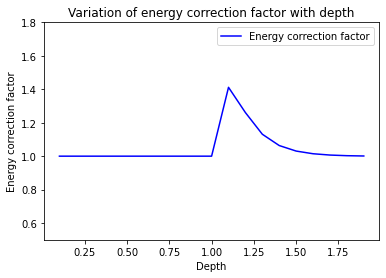

In [53]:
alpha1=[]
for k in range(1,20):
  alpha1.append((((v1[k]**3) * area[k])+2*((vf[k]**3)* area1[k]))/((v_avg[k]**3)*t_area[k]))
alpha1
d=np.arange(0.1,2,0.1)
import matplotlib.pyplot as plt
plt.plot(d,alpha1,'blue')
plt.xlabel('Depth')
plt.ylabel('Energy correction factor')
plt.title('Variation of energy correction factor with depth')
plt.ylim(0.5,1.8)
plt.legend(['Energy correction factor'])
plt.show()


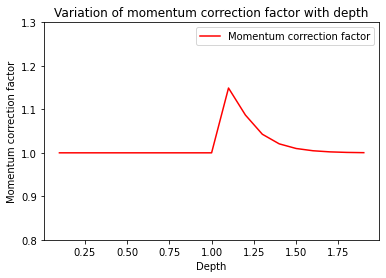

In [51]:
beta1=[]
for k in range(1,20):
  beta1.append((((v1[k]**2) * area[k])+2*((vf[k]**2)* area1[k]))/((v_avg[k]**2)*t_area[k]))
beta1
d=np.arange(0.1,2,0.1)
import matplotlib.pyplot as plt
plt.plot(d,beta1,'r')
plt.xlabel('Depth')
plt.ylabel('Momentum correction factor')
plt.title('Variation of momentum correction factor with depth')
plt.ylim(0.8,1.3)
plt.legend(['Momentum correction factor'])
plt.show()

In [46]:
#b normal flow depths using divided channel approach with vertical interfaces
B=1
Bf=3 
n=0.013
nf=0.0144
S0=0.0002
from scipy.optimize import newton
for Q in [1.6,2.5,3.5]:
  def func(y_):
    mannings=((B*y_)**(5/3)/(B+2)**(2/3))/n +2*((Bf*(y_-1))**(5/3)/(Bf+(y_-1))**(2/3))/nf -Q/((S0)**(1/2))
    return mannings
  print('The normal flow depth at',Q,'m3/s discharge is ', newton(func,1),'m')

The normal flow depth at 1.6 m3/s discharge is  1.309242960881066 m
The normal flow depth at 2.5 m3/s discharge is  1.467862652517782 m
The normal flow depth at 3.5 m3/s discharge is  1.6182558382607655 m


In [48]:
#c the normal flow depths using Horton’s method of equivalent roughness
B=1
Bf=3 
n=0.013
nf=0.0144
ne=(((B*n**(3/2))+2*(Bf*nf**(3/2)))/(B+2*Bf))**(2/3)
S0=0.0002
from scipy.optimize import newton
for Q in [1.6,2.5,3.5]:
  def func(y_):
    mannings=((B*y_)**(5/3)/(B+2)**(2/3))/ne +2*((Bf*(y_-1))**(5/3)/(Bf+(y_-1))**(2/3))/ne -Q/((S0)**(1/2))
    return mannings
  print('The normal flow depth at',Q,'m3/s discharge is ', newton(func,1),'m')

The normal flow depth at 1.6 m3/s discharge is  1.320743274258779 m
The normal flow depth at 2.5 m3/s discharge is  1.4780426482186502 m
The normal flow depth at 3.5 m3/s discharge is  1.6277035596328424 m


The first estimate is better because hortons assumes that the Total cross sectional mean velocity equals to subarea mean velocity for calculation of the discharge, which is not always possible in the compound section.In Horton's approach we take equivalent roughness for the entire cross section whereas in using divided channel approach with vertical interfaces we use diffrent roughness for the floodplains and the main section.